# minprj : forecastnig of stock
> author : baenhuengmyoung<br>
> date : 18 nov 2021
    

# abstract


미래를 에측하는 일은 매우 중요한 일이다. 인류의 역사속에서 예측은 매우 중요한 일로 여겨왔다. 예측이 정확하면 자신이 유리하도록 조치를 취할 수 있는 최적의 계산을 할 수 있다. 만약 전쟁이 일어날 것을 미리 알게 된다면 병력을 증강하거나 성을 쌓는 준비의 행위에 동기를 부여할 수 있다. 하지만 미래를 예측하는 일은 매우 어렵다. 일정한 간격으로 움직이는 시침이 60초 뒤에 제자리로 돌아온다는 것을 예측하는 것은 쉬우나 주식, 기후와 같은 일에 대해서 정확히 60초 뒤에 어떠한 일이 벌어질 것이라는 것을 예측하는 것은 어려우며 점점 관측해보고 싶은 시점일수록 더욱더 어렵다. 그 이유는 변화의 방향을 알기 어렵기 때문이다. time series데이터들은 아주 규칙적인 패턴을 보이는 경우는 드물다. 

이번 프로젝트의 목표는 테슬라 주식을 토대로 예측 모델을 만들어보는 것이다. 주식은 대표적인 time series데이터로써 예측하기 힘든 데이터이다. 이 데이터는 육안으로 볼 때 매우 불규칙적이며 구체적인 패턴을 찾기 어렵다. 따라서 규칙적 패턴을 만들기 위해 전처리 과정과 stationary한 상태인지 아닌지를 판별할 수 있는 ADFT기법을 동원해야 한다. 이 과정을 거치고 난 뒤 현재 데이터는 이전 데이터들의 weight sum의 관점을 충족시키기 위해 p,q,d의 파라미터들을 추정해보고 ARIMA모델에 적정한 파라미터에 대입하여 예측된 데이터와 실제 test데이터의 MAPE(mean absolute percentage error)값을 확인해 볼 것이다.


## work(1) : TimeSeries data

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
file_path = os.getenv('HOME') + '/aiffel/exp14_stock_prediction/data/TSLA.csv'
df = pd.read_csv(file_path, index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-18,448.350006,496.000000,443.500000,486.640015,486.640015,78044000
2020-11-19,492.000000,508.609985,487.570007,499.269989,499.269989,62475300
2020-11-20,497.989990,502.500000,489.059998,489.609985,489.609985,32911900
2020-11-23,503.500000,526.000000,501.790009,521.849976,521.849976,50260300
2020-11-24,540.400024,559.989990,526.200012,555.380005,555.380005,53648500


In [5]:
ts = df['Close']
ts.head()

Date
2020-11-18    486.640015
2020-11-19    499.269989
2020-11-20    489.609985
2020-11-23    521.849976
2020-11-24    555.380005
Name: Close, dtype: float64

## work(2) : preprocessing

In [6]:
ts.interpolate(method='time')
ts[ts.isna()]

Series([], Name: Close, dtype: float64)

In [7]:
ts_log = np.log(ts)
ts_log

Date
2020-11-18    6.187525
2020-11-19    6.213147
2020-11-20    6.193609
2020-11-23    6.257380
2020-11-24    6.319653
                ...   
2021-11-11    6.969330
2021-11-12    6.940629
2021-11-15    6.921056
2021-11-16    6.961040
2021-11-17    6.993024
Name: Close, Length: 252, dtype: float64

In [8]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('슝=3')

슝=3


## work(3) : check stationary and p-value for residual

In [9]:
# adft
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('슝=3')

슝=3


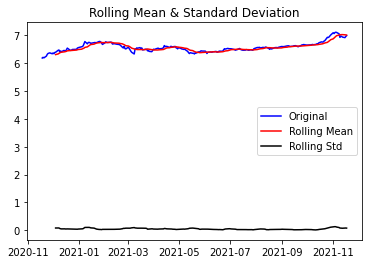

Results of Dickey-Fuller Test:
Test Statistic                  -1.508334
p-value                          0.529384
#Lags Used                       0.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


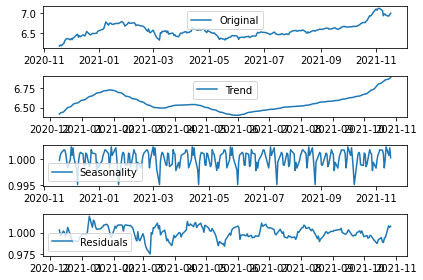

In [10]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


In [11]:
# stationary anlysis
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -5.556915
p-value                          0.000002
#Lags Used                       9.000000
Number of Observations Used    212.000000
Critical Value (1%)             -3.461578
Critical Value (5%)             -2.875272
Critical Value (10%)            -2.574089
dtype: float64


#### analysis 
로그화시켜 전처리를 거친 데이터를 stationary화 하기 위해 decomposition을 거쳐 p-value를 계산하기 위해 ADFT기법을 동원하여 결과를 산출하였다. 산출 결과 residual에 대한 p-value는 0.000002로 null hypothesis를 기각하는데 통상적으로 쓰는 기준값 0.005보다 훨씬 작다. p-value가 작다는 것은 null hypothesis를 기각하고 반대 가설에 힘을 실어주기 때문에 이 데이터는 stationary하다고 해석할 수 있다. 따라서 전처리된 데이터는 stationary하므로 모델 학습을 통해 적정한 weight를 계산하여 미래의 데이터를 예측할 수 있도록 training, test data로 가치가 있다.


## training and test dataset split



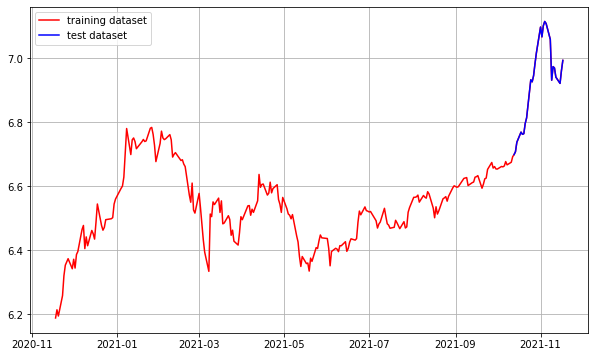

In [12]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

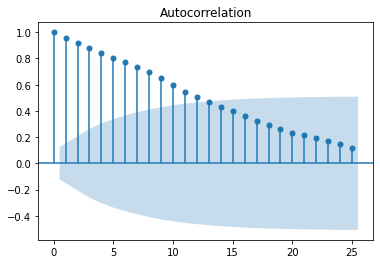

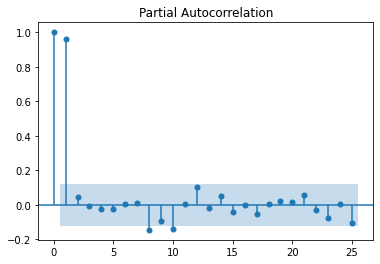

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.680915e+01
p-value                        1.202980e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.500000e+02
Critical Value (1%)           -3.456781e+00
Critical Value (5%)           -2.873172e+00
Critical Value (10%)          -2.572969e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -7.330376e+00
p-value                        1.131980e-10
#Lags Used                     1.400000e+01
Number of Observations Used    2.350000e+02
Critical Value (1%)           -3.458487e+00
Critical Value (5%)           -2.873919e+00
Critical Value (10%)          -2.573367e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -8.318538e+00
p-value                        3.624989e-13
#Lags Used                     1.600000e+01
Number of Observations Used    2.320000e+02
Critical Value (1%)           -3.458855e+00
Critical Value (5%)           -2.874080e+

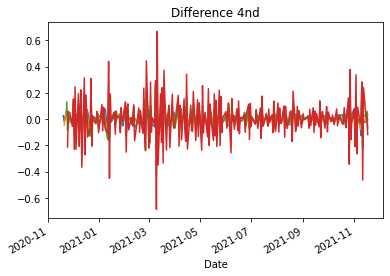

In [22]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

# 혹시 필요한 경우 3차 차분 구하기
diff_3 = diff_2.diff(periods=1).iloc[1:]
diff_3.plot(title='Difference 3nd')

augmented_dickey_fuller_test(diff_3)

# 혹시 필요한 경우 3차 차분 구하기
diff_4 = diff_3.diff(periods=1).iloc[1:]
diff_4.plot(title='Difference 4nd')

augmented_dickey_fuller_test(diff_4)

#### analysis : 

p,d,q의 적정한 값 찾기

In [30]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(14, 2, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

                             ARIMA Model Results                              
Dep. Variable:               D2.Close   No. Observations:                  224
Model:                ARIMA(14, 2, 0)   Log Likelihood                 448.858
Method:                       css-mle   S.D. of innovations              0.032
Date:                Thu, 18 Nov 2021   AIC                           -865.716
Time:                        11:50:25   BIC                           -811.130
Sample:                             2   HQIC                          -843.682
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -7.233e-05      0.000     -0.275      0.784      -0.001       0.000
ar.L1.D2.Close     -1.0520      0.066    -15.866      0.000      -1.182      -0.922
ar.L2.D2.Close     -1.0031      

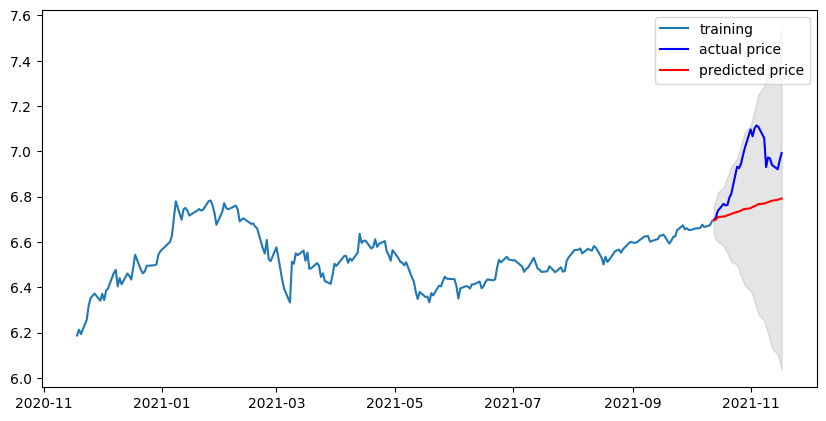

In [31]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()


In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))


MSE:  43523.641916752276
MAE:  174.86631050519753
RMSE:  208.62320560463132
MAPE: 15.88%


# anlysis 

테슬라 주식 데이터를 가져와 stationary한 상태로 전처리과정을 거치고 난 뒤 residual의 p-value를 산출하여 안정됨을 확인하고 ARIMA모델에 학습해본 결과 결과는 좋지 않은 모습을 보였다. 데이터 그래프에서 보았듯이 예측값과 테스트 값의 편차는 극명하게 보여진다. 겨우 상승세의 추세의 정보만 알아차릴 수 있을 정도이다. 하지만 구체적인 수치로 모델의 유효성을 살펴보면 통상 10%의 MAPE(mean absolute percentage error)의 기준에 충족하지 못하였다. 이에 대한 원인으로는 적정한 paramter들(p,q,d)값을 찾기 힘들기 때문이다. 

# In my opinion

주식, 기후와 같이 미래를 예측하는 것은 매우 어려운 영역이다. 이미지를 학습하는 것, 집값을 예측하는 것은 이전 방대한 데이터와 정답을 갖는 supervised learning의 기계학습이었고 괜찮은 성능의 모델을 만들 수 있었다. 하지만 이번 프로젝트에서 ARIMA모델은 다양한 독립 변수들에 대해서 종속변수의 관계에 대해서 학습하지 않았다. 분명 주식의 가치는 매우 다양한 사람의 심리적인 영향, 원자재가격, 통화가치 등에 매우 복잡하고 많은 변수들에 의해 영향을 받는다. 이 영향들을 모두 학습시키는 것은 대단히 어렵고 방대한 데이터를 필요로 하므로 이번 프로젝트에서는 통계학적 분석을 통한 ARIMA모델을 이용하였다. ARIMA모델은 단순히 데이터 들의 stationary하도록 가공한 뒤에 통계학적 관점으로 예측 모델을 만들었다. 그리고 아주 괜찮은 성능은 아니지만 오름과 하락의 추세정도는 알아맞힐 정도의 성능을 보여주었다. 

이러한 결과에 대해서 수학 공부의 필요성을 다소 느낄 수 있었다. 수학은 물리학과 어깨를 나란히할 수 있는 세상을 이해할 수 있는 근본적인 학문이다. 수학을 통해 복잡한 관계들을 추정할 수 있으며 이번 프로젝트에서도 주식의 오름과 하락의 추세정도는 추정할 수 있었다. 하지만 이번 lms를 진행하면서 통계학적 지식에 대해서 모두 이해하지 못하였다. 그리고 내가 진행한 프로젝트에 대해서 통계학적 이해를 기반으로 제대로 된 프로젝트를 수행하였는지에대해서 확신할 수 없다. 이번 프로젝트를 계기로 수학에 대한 학업을 강화하고 앞으로의 인공지능 학습에 대해서 수학적 수식과 알고리즘을 만들어 보고 싶다.